# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
'''
Tasked with building a representative model of city weather based on geolocation;
Will utilize OpenWeatherMap(API) & Citipy to develop model.

Requirements:
    1) randomly select 500 cities based on lat/long coordinates, 
    2) perform API calls on OpenWeatherMap to collect weather information per city,
    3) print log of a) city being processed, b) city number, & c) city name,
    4) Create scatterplots of:
            Temperature (F) vs. Latitude
            Humidity (%) vs. Latitude
            Cloudiness (%) vs. Latitude
            Wind Speed (mph) vs. Latitude
    4) output data to csv & save scatterplots to png,
    5) write up description of 3 obesrvable trends based on the data.
'''

'\nTasked with building a representative model of city weather based on geolocation;\nWill utilize OpenWeatherMap(API) & Citipy to develop model.\n\nRequirements:\n    1) randomly select 500 cities based on lat/long coordinates, \n    2) perform API calls on OpenWeatherMap to collect weather information per city,\n    3) print log of a) city being processed, b) city number, & c) city name,\n    4) Create scatterplots of:\n            Temperature (F) vs. Latitude\n            Humidity (%) vs. Latitude\n            Cloudiness (%) vs. Latitude\n            Wind Speed (mph) vs. Latitude\n    4) output data to csv & save scatterplots to png,\n    5) write up description of 3 obesrvable trends based on the data.\n'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rqst
import time
import json

# Import API key
from config import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
api_key

'&APPID=607a9efca97af1b6b17ec28444122aa3'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities = cities[0:10]


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
#Working API Call
rqst.get('http://api.openweathermap.org/data/2.5/weather?&APPID=607a9efca97af1b6b17ec28444122aa3&q=' + 'austin').json()

{'coord': {'lon': -97.74, 'lat': 30.27},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 276.78,
  'pressure': 1025,
  'humidity': 95,
  'temp_min': 275.35,
  'temp_max': 278.75},
 'visibility': 16093,
 'wind': {'speed': 3.1, 'deg': 320},
 'clouds': {'all': 1},
 'dt': 1544344500,
 'sys': {'type': 1,
  'id': 5739,
  'message': 0.0043,
  'country': 'US',
  'sunrise': 1544361371,
  'sunset': 1544398251},
 'id': 4671654,
 'name': 'Austin',
 'cod': 200}

In [6]:
# –––––––––––––––––––––––––––––––– * Query Configuration * 
units = 'metric'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + api_key

In [84]:
# API Calls to OpenWeatherMap
#   API Calls to populate lists which will make up columns of new dataframe
#   Columns: city, cloudiness, country, date, humidity, lat, long, max temp, wind speed
new_city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
min_temp = []
max_temp = []
temp = []
windspeed = []
city_number = 1

# Loop through the list of cities and perform a request for data on each
print('Begininning Data Retrieval\n|––––––––––––––––––––––––––––––––––––––––––––––––––––––|\n')
for city in cities:     #make api call to determine weather of city
    weather_response = rqst.get(query_url + '&q=' + city).json()
    print(f"Processing Information for City#{city_number}: {city}")
    try:
          
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp_max'])
        windspeed.append(weather_response['wind']['speed'])
        new_city.append(city) # 2reach final line of try statement, must pass all previous
        print('|––––––––––––––––––––––––––––––––––––––––––––––––––––––|')
    except:
        print('|––––––––––––––––––––––––––––––––––––––––––––––––––––––|')
        print('**WARNING: City Not Found')
        print('|––––––––––––––––––––––––––––––––––––––––––––––––––––––|')
 
    city_number += 1

print('|––––––––––––––––––––––––––––––––––––––––––––––––––––––|\nData Retrieval Complete\n|––––––––––––––––––––––––––––––––––––––––––––––––––––––|\n')


Begininning Data Retrieval
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|

Processing Information for City#1: kulhudhuffushi
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#2: chokurdakh
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#3: wau
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
**WARNING: City Not Found
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#4: albany
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#5: hovd
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#6: mitu
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#7: dukat
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#8: bredasdorp
|––––––––––––––––––––––––––––––––––––––––––––––––––––––|
Processing Information for City#

KeyboardInterrupt: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
city_data = pd.DataFrame(
    {'City': new_city,
     'Cloudiness': cloudiness,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Latitude': lat,
     'Longitude': lon,
     'Max Temp': temp,
     'Wind Speed': windspeed
    })
city_data.count()


City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Latitude      537
Longitude     537
Max Temp      537
Wind Speed    537
dtype: int64

In [54]:
city_data['City'] = city_data['City'].apply(lambda x: x.capitalize())
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Kulhudhuffushi,0,MV,1544342876,100,6.62,73.07,301.449,2.36
1,Chokurdakh,44,RU,1544342876,46,70.62,147.90,239.674,3.18
2,Albany,90,US,1544342280,87,42.65,-73.75,267.050,1.03
3,Hovd,90,NO,1544341800,100,63.83,10.70,274.150,4.10
4,Mitu,48,IR,1544342877,86,36.20,46.09,277.749,1.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [65]:
'''
ScatterPlot Template
plt.scatter(city_data[XAXIS],city_data[YAXIS], alpha=TRANSPARENCY)
plt.title('XAXIS VS YAXIS')
plt.xlabel('Latitude')
plt.ylabel('YAXIS')
plt.show()
plt.savefig('Output File Name')
'''
time_stamp = time.strftime("%m/%d/%Y")
time_stamp

'12/09/2018'

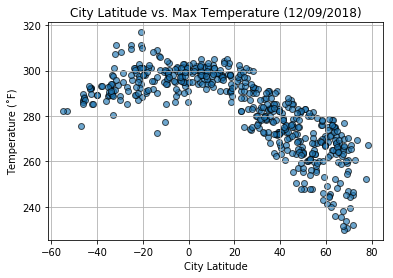

In [77]:
plt.scatter(city_data['Latitude'],city_data['Max Temp'], edgecolors='black', alpha=0.65)
plt.grid()
plt.title(f'City Latitude vs. Max Temperature ({time_stamp})')
plt.xlabel('City Latitude')
plt.ylabel('Temperature (˚F)')
plt.show()

#### Latitude vs. Humidity Plot

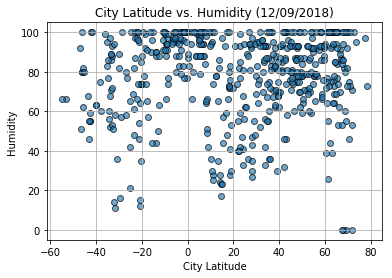

In [79]:
plt.scatter(city_data['Latitude'],city_data['Humidity'], edgecolors='black', alpha=0.65)
plt.grid()
plt.title(f'City Latitude vs. Humidity ({time_stamp})')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()

#### Latitude vs. Cloudiness Plot

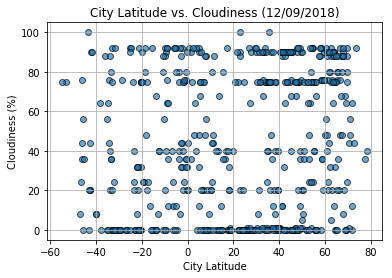

In [80]:
plt.scatter(city_data['Latitude'],city_data['Cloudiness'], edgecolors='black', alpha=0.65)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({time_stamp})')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

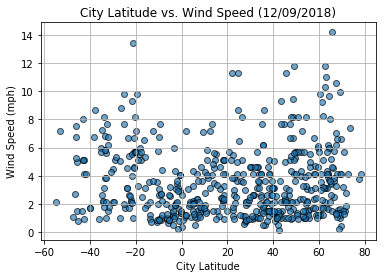

In [82]:
plt.scatter(city_data['Latitude'],city_data['Wind Speed'], edgecolors='black', alpha=0.65)
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({time_stamp})')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()